## Assignment 2

**Submission deadlines:** 
- get at least 4 points by Tuesday, 23.03.2021
- remaining points: last lab session before or on Tuesday, 13.04.2021 (02.04.2021 – 06.04.2021 there is Easter break)

**Points:** Aim to get 16 out of 20+ possible points

## Submission instructions
The class is held remotely. To submit your solutions please show the notebook over the video call. Make sure you know all the questions and answers, and that the notebook contains results (before presentation do `Runtime -> Restart and run all`)

We provide starter code, however, you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Problems

## Problem 1 [1p]:

Let's see why GPUs are useful in deep learning. Compare matrix multiplication speed for a few matrix shapes when implemented:
1. as loops in Python
2. using np.einsum
3. using numpy on CPU
4. using pytorch on CPU
5. using pytorch on GPU

Finally, consider two square matrices, $A$ and $B$. We have 4 possibilities of multiplying them or their transpositions:
1. $AB$
2. $A^TB$
3. $AB^T$
4. $A^TB^T$

Which option is the fastest? Why?

In [83]:
#@title Problem 1 solution
import torch
import numpy as np
from time import time
def evaluate_multiplication_time(n, m, h, tA=False, tB=False, rounds=20):

  res = {}
  def measure_time(f, A, B):
    av = 0
    for _ in range(rounds):
      start = time()
      f(A, B)
      av += (time() - start) * 1000
    res[f.__name__] =  av / rounds

  def torch_gpu(A, B):
    C = torch.matmul(A, B)

  def torch_cpu(A, B):
    C = torch.matmul(A, B)

  def np_matmul(A, B):
    C = A @ B

  def np_einsum(A, B):
    C = np.einsum('ij,jk->ik', A, B)

  def py_loops_(A, B):
    n, m = A.shape
    m, h = B.shape
    C = np.zeros((n, h))
    for i in range(n):
      for j in range(h):
        for k in range(m):
          C[i][j] += A[i][k] * B[k][j]

  np.random.seed(69)
  A = np.random.rand(n, m)
  if tA: A = A.T
  B = np.random.rand(m, h)
  if tB: A = A.T


  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print("\nDevice:", device)
  print(f"A: {n}x{m}")
  print(f"B: {m}x{h}")
  print(f"A transposed: {tA}\nB transposed: {tB}")
  A_torch = torch.from_numpy(A).type(torch.FloatTensor)
  B_torch = torch.from_numpy(B).type(torch.FloatTensor)
  A_torch_gpu = torch.from_numpy(A).type(torch.FloatTensor).to(device)
  B_torch_gpu = torch.from_numpy(B).type(torch.FloatTensor).to(device)

  measure_time(py_loops_, A, B)
  measure_time(np_einsum, A, B)
  measure_time(np_matmul, A, B)
  measure_time(torch_cpu, A_torch, B_torch)
  measure_time(torch_gpu, A_torch_gpu, B_torch_gpu)
  for k, v in sorted(res.items(), key=lambda item: item[1]):
    print(k, v)

    
print("Comparing different approaches")
evaluate_multiplication_time(5, 5, 5, False, False)
evaluate_multiplication_time(10, 10, 10, False, False)

evaluate_multiplication_time(50, 50, 50, False, False)
evaluate_multiplication_time(100, 100, 100, False, False)

print("\n\nComparing fully transposed/untransposed not square matrices multiplication")
evaluate_multiplication_time(10, 100, 10, True, True)
evaluate_multiplication_time(10, 100, 10, False, False)

print("\n\nComparing transposed/untransposed square matrices multiplication")
evaluate_multiplication_time(30, 30, 30, True, False)
evaluate_multiplication_time(30, 30, 30, False, True)
evaluate_multiplication_time(30, 30, 30, False, False)
evaluate_multiplication_time(30, 30, 30, True, True)

Comparing different approaches

Device: cpu
A: 5x5
B: 5x5
A transposed: False
B transposed: False
np_matmul 0.0012993812561035156
torch_gpu 0.0013470649719238281
np_einsum 0.003993511199951172
torch_cpu 0.01119375228881836
py_loops_ 0.053811073303222656

Device: cpu
A: 10x10
B: 10x10
A transposed: False
B transposed: False
np_matmul 0.0010132789611816406
torch_gpu 0.0015854835510253906
np_einsum 0.003159046173095703
torch_cpu 0.0038385391235351562
py_loops_ 0.39714574813842773

Device: cpu
A: 50x50
B: 50x50
A transposed: False
B transposed: False
torch_gpu 0.0027060508728027344
np_matmul 0.009417533874511719
torch_cpu 0.010895729064941406
np_einsum 0.030851364135742188
py_loops_ 48.08540344238281

Device: cpu
A: 100x100
B: 100x100
A transposed: False
B transposed: False
torch_gpu 0.005495548248291016
torch_cpu 0.007736682891845703
np_einsum 0.16554594039916992
np_matmul 9.779751300811768
py_loops_ 384.7018241882324


Comparing fully transposed/untransposed not square matrices multiplic

## Problem 2: Stochastic Gradient Descent [3p] ✅

We provide below starter code that trains a softmax regression model. Alternatively, implement your own training loop and use it to solve this problem jointly with the next one.

Implement the following additions to the SGD code provided:
  1. **[1p]** momentum
  2. **[1p]** learning rate schedule
  3. **[1p]** weight decay, in which we additionally minimize for each weight matrix (but typically not the bias) the sum of its elements squared. One way to implement it is to use the function `model.named_parameters` and select all parameters whose names contain "`weight`" rather than "`bias`".

## Problem 3: Tuning the Network for MNIST [4p]✅

Tune the following network to reach **validation error rate below 1.9%**.
This should result in a **test error rate below 2%**. To
tune the network you will need to:
1. Choose the number of layers (more than 1, less than 5);
2. Choose the number of neurons in each layer (more than 100,
    less than 5000);
3. Pick proper weight initialization;
4. Pick proper learning rate schedule (need to decay over time,
    a good range to check on MNIST is about 1e-2 ... 1e-1 at the beginning and
    half of that after 10000 batches);
5. Pick a momentum constant (probably a constant one will be OK).


Please note: there are many hyperparameter settings that give the desired answer, some may require tuning all hyperparameters, some only a few.

## Problem 4: Convolutional Network [2p]✅

Use convolutional and max-pooling layers (`Conv2d`, `Max_pool2d` or their functional variants) and (without dropout) get a test error rate below 1.5%.

## Problem 5: Dropout [2p] ✅ (1.5 rn. might implement it by myself later)

Learn about dropout:

- implement a **dropout** layer 
- or use `nn.Dropout` (then the exercise is worth 1.5 points)

and try to train a
network getting below 1.5% test error rates with dropout, but no convolutions, or below 1% when dropout is used jointly with convolutions!

Remember to turn off dropout during testing, using `model.train()` and `model.eval()`!

Hint: Use [torch.nn.functional.dropout](http://pytorch.org/docs/master/nn.html#torch.nn.functional.dropout).

Details: http://arxiv.org/pdf/1207.0580.pdf.

## Problem 6: Data Augmentation [1p] ✅

Apply data augmentation methods (e.g. rotations, noise, crops) when training networks on MNIST, to significantly reduce test error rate for your network. You can use functions from the [torchvision.transforms](http://pytorch.org/docs/master/torchvision/transforms.html) module.

Please note: when using random transformations during training, use a data loader that re-computes them for each training minibatch. The `InMemoryDataloader` assumes that the transformations are deterministic and applies them only once.

## Problem 7: Batch Normalization [1p] ✅

[Batch Normalization](https://arxiv.org/abs/1502.03167) helps training neural networks because it [normalizes layer activation magnitudes](https://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf). It typically allows to train networks faster and/or with higher learning rates, lessens the importance
of initialization and might eliminate the need for Dropout.

Implement Batch Normalization and compare with regular training of MNIST models.

Remember to use the batch statistics during model training and to use an average of training batch statistics during model evaluation. For details please consult the paper.

## Problem 8: Norm Constraints [1p] ✅

Implement norm constraints, i.e. instead of weight decay, that tries to set all weights to small values, apply a limit on the total
norm of connections incoming to a neuron. In our case, this
corresponds to clipping the norm of *rows* of weight
matrices. An easy way of implementing it is to make a gradient
step, then look at the norm of rows and scale down those that are
over the threshold (this technique is called "projected gradient descent").

Please consult the Dropout paper (http://arxiv.org/pdf/1207.0580.pdf) for details.

## Problem 9: Polyak Averaging [1p] ✅

Implement Polyak averaging. For each parameter $\theta$
keep a separate, exponentially decayed average of the past values
$$
\bar{\theta}_n = \alpha_p\bar{\theta}_{n-1} + (1-\alpha_p)\theta_n.
$$
Use that average when evaluating the model on the test set.
Validate the approach by training a model on the MNIST dataset.

## Problem 10: Hyperparameter tuner [1p] ✅

Implement a hyper-parameter tuner able to optimize the learning rate schedule, number of neurons, and similar hyperparameters. To start, use a random search (please see http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf and especially Fig 1. for intuitions on why random search is better than grid search). It may be a good idea to use a fixed maximum number of epochs (or training time) for each optimization trial to prevent selecting hyperparameters that yield slowly converging solutions. A good result will be a set of hyperparameters that reach on MNIST solutions with test errors less than $1.3\%$ in no more than 50 epochs.

## Problem 11: Pruning [1p] ✅

Prune the MNIST network to retain validation accuracy no worse than 0.1 percentage point at maximum sparsity (maximal number of weights removed from the network).

One way to do it is to 
1. train the network, 
2. set to zero smalles weights (typically you can zero up to 50% of weights)
3. retrain the network, keeping the zeroed weights zeroed, and repeat

## Problem 12: Extreme Learning Machine (ELM) [2p] ✅

Consider a neural network with 1 hidden layer. In the extreme learning approach, the first layer is not trained, but instead, it is randomly set. It is often very large. The second (output) layer weights can then be set using the closed-form formula for linear regression. Thus, training an ELM is fast (there is no iterative optimization) and one can try many different hyperparameters, such as hidden layer size, the random distribution from which weights are sampled, the hidden activation function, and so forth.

Task: Implement an ELM for MNIST and try to reach the performance of your backpropagation-trained model.

## Problem 13: Other tricks [1p-many]

The neural network literature is full of tricks for training neural networks. Find some and implement them. Please note: the number of points depends on the hardness of the extension you want to implement. If in doubt, consult the TA beforehand

# Starter code

The code below trains a SoftMax regression model in PyTorch. It can easily be extended into a full multilayer neural network.

In [5]:
%matplotlib inline

In [85]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from tqdm.auto import tqdm
import math

import torch
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms as T
from torch import nn

import optuna

In [7]:
def compute_error_rate(model, data_loader, device="cpu"):
    """Evaluate model on all samples from the data loader.
    """
    # Put the model in eval mode, and move to the evaluation device.
    model.eval()
    model.to(device)
    if isinstance(data_loader, InMemDataLoader):
        data_loader.to(device)

    num_errs = 0.0
    num_examples = 0
    # we don't need gradient during eval!
    with torch.no_grad():
        for x, y in data_loader:
            x = x.to(device)
            y = y.to(device)
            outputs = model.forward(x)
            _, predictions = outputs.data.max(dim=1)
            num_errs += (predictions != y.data).sum().item()
            num_examples += x.size(0)
    return num_errs / num_examples


def plot_history(history):
    """Helper to plot the trainig progress over time."""
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    train_loss = np.array(history["train_losses"])
    plt.semilogy(np.arange(train_loss.shape[0]), train_loss, label="batch train loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    train_errs = np.array(history["train_errs"])
    plt.plot(np.arange(train_errs.shape[0]), train_errs, label="batch train error rate")
    val_errs = np.array(history["val_errs"])
    plt.plot(val_errs[:, 0], val_errs[:, 1], label="validation error rate", color="r")
    plt.ylim(0, 0.20)
    plt.legend()

## Data loading

Training speed is important. By default, data is loaded on the CPU, then shipped in batches to the GPU. For this exercise, we will load the full dataset onto the GPU, which speeds up training.

In [8]:
class InMemDataLoader(object):
    """
    A data loader that keeps all data in CPU or GPU memory.
    """

    __initialized = False

    def __init__(
        self,
        dataset,
        batch_size=1,
        shuffle=False,
        sampler=None,
        batch_sampler=None,
        drop_last=False,
        augment=False,
    ):
        """A torch dataloader that fetches data from memory."""
        batches = []
        for i in tqdm(range(len(dataset))):
            batch = [torch.tensor(t) for t in dataset[i]]
            batches.append(batch)
        tensors = [torch.stack(ts) for ts in zip(*batches)]
        dataset = torch.utils.data.TensorDataset(*tensors)
        self.dataset = dataset
        self.batch_size = batch_size
        self.drop_last = drop_last
        self.augment = augment

        if batch_sampler is not None:
            if batch_size > 1 or shuffle or sampler is not None or drop_last:
                raise ValueError(
                    "batch_sampler option is mutually exclusive "
                    "with batch_size, shuffle, sampler, and "
                    "drop_last"
                )
            self.batch_size = None
            self.drop_last = None

        if sampler is not None and shuffle:
            raise ValueError("sampler option is mutually exclusive with " "shuffle")

        if batch_sampler is None:
            if sampler is None:
                if shuffle:
                    sampler = torch.utils.data.RandomSampler(dataset)
                else:
                    sampler = torch.utils.data.SequentialSampler(dataset)
            batch_sampler = torch.utils.data.BatchSampler(
                sampler, batch_size, drop_last
            )

        self.sampler = sampler
        self.batch_sampler = batch_sampler
        self.__initialized = True

    def __setattr__(self, attr, val):
        if self.__initialized and attr in ("batch_size", "sampler", "drop_last"):
            raise ValueError(
                "{} attribute should not be set after {} is "
                "initialized".format(attr, self.__class__.__name__)
            )

        super(InMemDataLoader, self).__setattr__(attr, val)

    """
        transforms.ElasticTransform(alpha100.0) should give decent improvement 
        but takes ungodly amount of time to apply.
    """
    def __iter__(self):
        for batch_indices in self.batch_sampler:
            batch = self.dataset[batch_indices]
            if self.augment:
                xs = []
                ys = []
                ts = T.Compose([
                    T.ToPILImage(),
                    T.RandomRotation(10),
                    #T.RandomCrop(size=(24,24)),
                    T.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 1)),
                    T.ToTensor(),
                ])
                num_samples = 2
                for x, y in zip(batch[0], batch[1]):
                    for _ in range(num_samples):
                        xs.append(ts(x))
                        ys.append(y)
                yield(torch.stack(xs), torch.stack(ys))
            else:
                yield batch


    def __len__(self):
        return len(self.batch_sampler)

    def to(self, device):
        self.dataset.tensors = tuple(t.to(device) for t in self.dataset.tensors)
        return self

In [9]:

# Monkey-patch MNIST to use a more robust MIST mirror

torchvision.datasets.MNIST.mirrors = [
        'http://yann.lecun.com/exdb/mnist/',
        'https://ossci-datasets.s3.amazonaws.com/mnist/',
    ]

torchvision.datasets.MNIST.resources = [
        ("train-images-idx3-ubyte.gz", "f68b3c2dcbeaaa9fbdd348bbdeb94873"),
        ("train-labels-idx1-ubyte.gz", "d53e105ee54ea40749a09fcbcd1e9432"),
        ("t10k-images-idx3-ubyte.gz", "9fb629c4189551a2d022fa330f9573f3"),
        ("t10k-labels-idx1-ubyte.gz", "ec29112dd5afa0611ce80d1b7f02629c")
    ]

In [10]:
# Load the data

batch_size = 256
data_path = "./data"

transform = T.Compose(
    [
        T.ToTensor(),
        #T.Normalize((0.1307,), (0.3081,)),

    ]
)

_test = torchvision.datasets.MNIST(
    data_path, train=False, download=True, transform=transform
)

# Load training data, split into train and valid sets
_train = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_train.data = _train.data[:50000]
_train.targets = _train.targets[:50000]

_valid = torchvision.datasets.MNIST(
    data_path, train=True, download=True, transform=transform
)
_valid.data = _valid.data[50000:]
_valid.targets = _valid.targets[50000:]

mnist_loaders = {
    "train": InMemDataLoader(_train, batch_size=batch_size, shuffle=True, augment=False),
    "valid": InMemDataLoader(_valid, batch_size=batch_size, shuffle=False),
    "test": InMemDataLoader(_test, batch_size=batch_size, shuffle=False),
}

  0%|          | 0/50000 [00:00<?, ?it/s]

/var/folders/nz/sz0gtb0n4990pkkc9bgjt7580000gn/T/ipykernel_23738/166908558.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch = [torch.tensor(t) for t in dataset[i]]


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

# SGD

In [94]:
def SGD(
    model,
    data_loaders, 
    alpha=1e-4,
    epsilon=0.0,
    decay=0.0,
    alpha_decay=0,
    polyak=0,
    norm_constraint=0,
    num_epochs=1,
    max_num_epochs=np.nan,
    patience_expansion=1.5,
    log_every=100,
    verbose=True,
    device='cpu',
    prune_masks=None,
):
    
    # Put the model in train mode, and move to the evaluation device.
    model.train()
    model.to(device)
    for data_loader in data_loaders.values():
        if isinstance(data_loader, InMemDataLoader):
            data_loader.to(device)
    
    velocities = [torch.zeros_like(p, device=device) for p in model.parameters()]
    params_averaged = [torch.zeros_like(p, device=device) for p in model.parameters()]
    alpha_init = alpha

    iter_ = 0
    epoch = 0
    best_params = None
    best_val_err = np.inf

    history = {'train_losses': [], 'train_errs': [], 'val_errs': []}
    if verbose:
        print('Training the model!')
        print('Interrupt at any time to evaluate the best validation model so far.')
    try:
        tstart = time.time()
        siter = iter_
        while epoch < num_epochs:
            model.train()
            epoch += 1
            if epoch > max_num_epochs:
                break
        
            for x, y in data_loaders['train']:
                x = x.to(device)
                y = y.to(device)
                iter_ += 1
                # This calls the `forward` function: https://pytorch.org/tutorials/beginner/examples_nn/two_layer_net_module.html
                out = model(x)
                loss = model.loss(out, y)
                loss.backward()
                _, predictions = out.max(dim=1)
                batch_err_rate = (predictions != y).sum().item() / out.size(0)

                history['train_losses'].append(loss.item())
                history['train_errs'].append(batch_err_rate)
                
                # disable gradient computations - we do not want torch to
                # backpropagate through the gradient application!
                if not prune_masks: 
                    prune_masks = [torch.ones_like(p, device=device) for p in model.parameters()]
                else:
                    prune_masks = [p.to(device) for p in prune_masks]
                    
                with torch.no_grad():
                    for (name, p), v, p_averaged, prune_mask in zip(model.named_parameters(), velocities, params_averaged, prune_masks):
                        if "bn" in name: 
                            continue
                            
                        if 'weight' in name:
                            if norm_constraint != 0:
                                norms = torch.norm(p.grad, p=2, dim=0)
                                scale = torch.clamp(norms / norm_constraint, max=1).view(-1,1)
                                p.grad = (p.grad.T * scale.view(-1, 1)).T
                            else:
                                p.grad += decay * p * 2
                        
                        alpha = alpha_init * np.e ** (-alpha_decay * epoch)
                        
                        v[:] = v * epsilon - alpha * p.grad

                        p += v
                        p[:] = p * prune_mask

                        p_averaged[:] = p_averaged * polyak + (1 - polyak) * p

                        p.grad.zero_()

                if iter_ % log_every == 0 and verbose:
                    num_iter = iter_ - siter + 1
                    print("Minibatch {0: >6}  | loss {1: >5.2f} | err rate {2: >5.2f}%, steps/s {3: >5.2f}" \
                          .format(iter_, loss.item(), batch_err_rate * 100.0, num_iter / (time.time() - tstart)))
                    tstart = time.time()
                           
            
            val_err_rate = compute_error_rate(model, data_loaders['valid'], device)
            history['val_errs'].append((iter_, val_err_rate))
            
            if val_err_rate < best_val_err:
                # Adjust num of epochs
                num_epochs = int(np.maximum(num_epochs, epoch * patience_expansion + 1))
                best_epoch = epoch
                best_val_err = val_err_rate
                best_params = [p.detach().cpu() for p in model.parameters()]
            
            if verbose:
                clear_output(True)
                m = "After epoch {0: >2} | valid err rate: {1: >5.2f}% | doing {2: >3} epochs" \
                    .format(epoch, val_err_rate * 100.0, num_epochs)
                print('{0}\n{1}\n{0}'.format('-' * len(m), m))

    except KeyboardInterrupt:
        pass
            
    if polyak != 0:
        with torch.no_grad():
            for p, p_averaged  in zip(model.parameters(), params_averaged):
                p[...] = p_averaged
    elif best_params is not None:
        if verbose:
            print("\nLoading best params on validation set (epoch %d)\n" %(best_epoch))
        with torch.no_grad():
            for param, best_param in zip(model.parameters(), best_params):
                param[...] = best_param
    if verbose:
        plot_history(history)

# no CNN, no BN

----------------------------------------------------------
After epoch 14 | valid err rate:  1.96% | doing  14 epochs
----------------------------------------------------------
-------------------------------------------
Test error rate: 1.920%, training took 34s.
-------------------------------------------


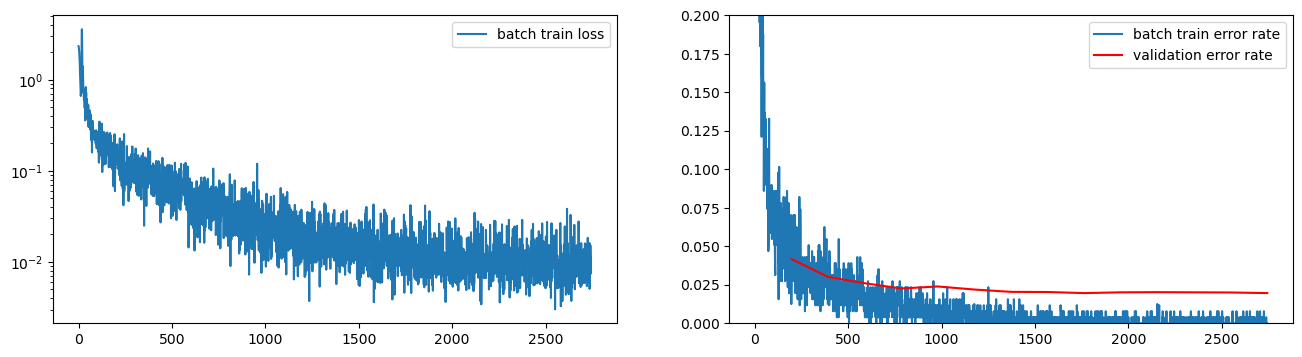

In [144]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if 'weight' in name:
            nn.init.xavier_normal_(p)
        elif 'bias' in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

t_start = time.time()

SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device='cpu', epsilon=0.95, alpha_decay=0.2, decay=2e-4, polyak=0.1, norm_constraint=3e-2, log_every=250)

test_err_rate = compute_error_rate(model, mnist_loaders['test'])
m = (f"Test error rate: {test_err_rate * 100.0:.3f}%, "
     f"training took {time.time() - t_start:.0f}s.")
print('{0}\n{1}\n{0}'.format('-' * len(m), m))

# no CNN, BN 

----------------------------------------------------------
After epoch 32 | valid err rate:  1.67% | doing  32 epochs
----------------------------------------------------------

Loading best params on validation set (epoch 21)

-------------------------------------------
Test error rate: 1.610%, training took 82s.
-------------------------------------------


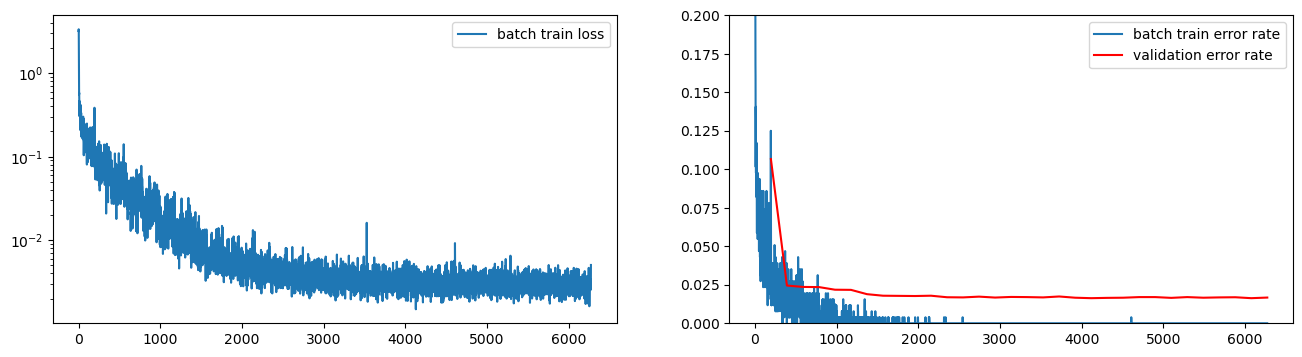

In [114]:
class Model(nn.Module):
    def __init__(self, *args, **kwargs):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 3000)
        self.fc2 = nn.Linear(3000, 900)
        self.fc3 = nn.Linear(900, 10)
        
        self.bn1 = nn.BatchNorm1d(3000)
        self.bn2 = nn.BatchNorm1d(900)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        
        x = self.fc3(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "bn" in name:
            nn.init.normal_(p)
        elif 'weight' in name:
            nn.init.xavier_normal_(p)
        elif 'bias' in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

t_start = time.time()

"""
hypertuner:

alpha: 0.09988190681568938
alpha_decay: 0.16036275359595425
decay: 0.0035010387048683574
epsilon: 0.47280987350026266
h1: 3159
h2: 2874
"""

SGD(
    model, 
    mnist_loaders, 
    alpha=1e-1, 
    max_num_epochs=100, 
    device='mps', 
    epsilon=0.47, 
    alpha_decay=0.16,
    decay=0.0035, 
    polyak=0, 
    log_every=250)

test_err_rate = compute_error_rate(model, mnist_loaders['test'])
m = (f"Test error rate: {test_err_rate * 100.0:.3f}%, "
     f"training took {time.time() - t_start:.0f}s.")
print('{0}\n{1}\n{0}'.format('-' * len(m), m))

# CNN + dropout, error rate < 1%

----------------------------------------------------------
After epoch  7 | valid err rate:  0.98% | doing  11 epochs
----------------------------------------------------------
Minibatch   1400  | loss  0.04 | err rate  1.17%, steps/s 239.94

Loading best params on validation set (epoch 7)

-------------------------------------------
Test error rate: 0.840%, training took 86s.
-------------------------------------------


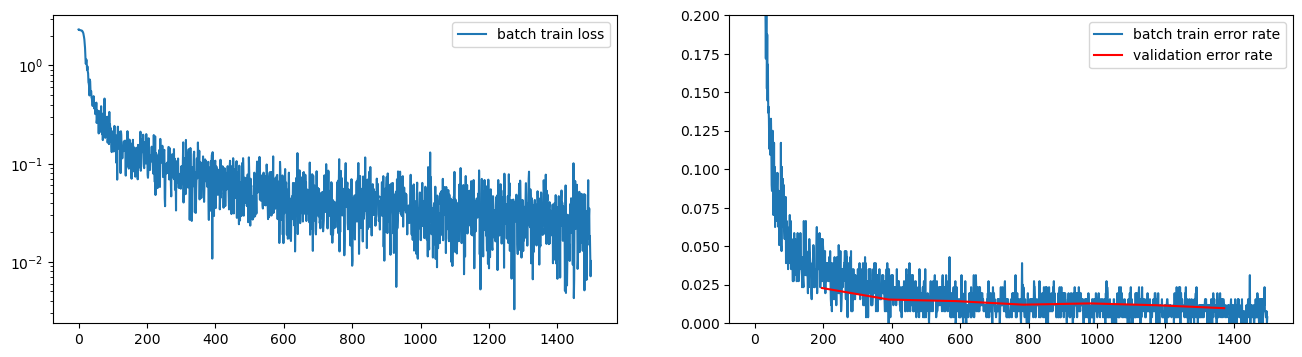

In [11]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.pool = nn.MaxPool2d(2, 2)
        
        self.conv1 = nn.Conv2d(1, 20, 5)   # 28x28x1 -> 20x24x24 -> 20x12x12
        self.conv2 = nn.Conv2d(20, 40, 5)  # 20x12x12 -> 40x8x8 -> 40x4x4
        
        self.fc1 = nn.Linear(40 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        
        self.dropout = nn.Dropout(0.4)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 40 * 4 * 4)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.fc4(x)
        return x
    
    def loss(self, Out, Targets):
        return F.cross_entropy(Out, Targets)

model = Model()

with torch.no_grad():
    # Initialize parameters
    for name, p in model.named_parameters():
        if "bn" in name:
            nn.init.normal_(p)
        elif 'weight' in name:
            nn.init.xavier_normal_(p)
        elif 'bias' in name:
            p.zero_()
        else:
            raise ValueError('Unknown parameter name "%s"' % name)

t_start = time.time()

SGD(model, mnist_loaders, alpha=1e-1, max_num_epochs=30, device='mps', epsilon=0.9, alpha_decay=0.2, decay=0.0005)


test_err_rate = compute_error_rate(model, mnist_loaders['test'])
m = (f"Test error rate: {test_err_rate * 100.0:.3f}%, "
     f"training took {time.time() - t_start:.0f}s.")
print('{0}\n{1}\n{0}'.format('-' * len(m), m))

# Pruning

In [107]:
import copy

def prune_(model, percentile):
    pruned = model
    masks = []
    with torch.no_grad():
        for name, p in pruned.named_parameters():
            if not "bn" in name and "weight" in name:
                threshold = torch.kthvalue(p.flatten(), int(percentile * p.numel() / 100)).values
                mask = (p > threshold).float()
                p[:] = p * mask
                masks.append(mask)
            else:
                masks.append(torch.ones_like(p))
                
    return masks

test_err_rate = compute_error_rate(model, mnist_loaders['test'])


print(f"Test error rate (unpruned): {test_err_rate * 100.0:.3f}%")

pruned = copy.deepcopy(model)
masks = prune_(pruned, 30)

test_err_rate = compute_error_rate(pruned, mnist_loaders['test'])
print(f"Test error rate (pruned before retraining): {test_err_rate * 100.0:.3f}%")

SGD(
    pruned,
    mnist_loaders,
    alpha=1e-1,
    max_num_epochs=20,
    device='mps',
    epsilon=0.95,
    alpha_decay=0.5,
    decay=0.0002,
    polyak=0,
    log_every=250,
    prune_masks=masks,
    verbose=False
)

test_err_rate = compute_error_rate(pruned, mnist_loaders['test'])
print(f"Test error rate (pruned after retraining): {test_err_rate * 100.0:.3f}%")

print()
for name, param in model.named_parameters():
    num_zeros = torch.sum(torch.eq(param, 0))
    print("Number of zero elements in model's parameter '{}': {}".format(name, num_zeros.item()))
print()
for name, param in pruned.named_parameters():
    num_zeros = torch.sum(torch.eq(param, 0))
    print("Number of zero elements in pruned model's parameter '{}': {}".format(name, num_zeros.item()))

Test error rate (unpruned): 1.430%
Test error rate (pruned before retraining): 89.720%
Test error rate (pruned after retraining): 1.700%

Number of zero elements in model's parameter 'fc1.weight': 8224
Number of zero elements in model's parameter 'fc1.bias': 83
Number of zero elements in model's parameter 'fc2.weight': 5242
Number of zero elements in model's parameter 'fc2.bias': 37
Number of zero elements in model's parameter 'fc3.weight': 51
Number of zero elements in model's parameter 'fc3.bias': 0
Number of zero elements in model's parameter 'bn1.weight': 0
Number of zero elements in model's parameter 'bn1.bias': 0
Number of zero elements in model's parameter 'bn2.weight': 0
Number of zero elements in model's parameter 'bn2.bias': 0

Number of zero elements in pruned model's parameter 'fc1.weight': 241656
Number of zero elements in pruned model's parameter 'fc1.bias': 71
Number of zero elements in pruned model's parameter 'fc2.weight': 157426
Number of zero elements in pruned model

# ELM
$(Xw + b)\beta = y $

$\beta = (Xw + b)^{-1}y $

$w, b$ - randomly initialised
 
 $w : d \times h$
 
 $b : 1 \times h$

$\beta : h \times m$

In [61]:
thresh = 50000
x = []
y = []

for batch in mnist_loaders['train']:
    x.append(batch[0])
    y.append(batch[1])

x = torch.cat(x[:thresh], dim=0).numpy()
y = torch.cat(y[:thresh], dim=0).numpy()

y_one_hot = np.zeros((len(y), 10))
y_one_hot[np.arange(len(y)), y] = 1


x_tst = []
y_tst = []

for batch in mnist_loaders['test']:
    x_tst.append(batch[0])
    y_tst.append(batch[1])

x_tst = torch.cat(x_tst[:thresh], dim=0).numpy()
y_tst = torch.cat(y_tst[:thresh], dim=0).numpy()

y_tst_one_hot = np.zeros((len(y), 10))
y_tst_one_hot[np.arange(len(y)), y] = 1

In [89]:
class ELM:
    def sigmoid(self, x): 
        return 1 / (1 + np.exp(-x))
    
    def __init__(self, h, d=28*28, m=10):
        self.h = h
        self.d = d
        self.m = m
        
        self.w = np.random.uniform(-1., 1., size=(d, h))
        self.bias = np.random.uniform(-1., 1., size=(1, h))
        self.beta = np.random.uniform(-1., 1., size=(h, m))
        
    def fit(self, x, y):
        x = x.reshape(-1, 28*28)
        x = (x @ self.w + self.bias)
        x = self.sigmoid(x)
        self.beta = np.linalg.pinv(x) @ y
        
    def forward(self, x):
        x = x.reshape(-1, 28*28)
        x = (x @ self.w + self.bias)
        x = self.sigmoid(x)
        x = x @ self.beta
        return x.argmax(axis=1)
    
    def evaluate(self, x, y):
        return (1 - (self.forward(x) == y).mean())
    

model = ELM(h=5000)

t_start = time.time()
model.fit(x, y_one_hot)

m = (f"Test error rate: {model.evaluate(x_tst, y_tst) * 100.0:.3f}%, "
     f"training took {time.time() - t_start:.0f}s.")
print('{0}\n{1}\n{0}'.format('-' * len(m), m))

# Error rate ~ 3.130% with h=5000, training time ~ 120s

--------------------------------------------
Test error rate: 3.130%, training took 123s.
--------------------------------------------


# Hyperparameter tuner (using optuna)

In [117]:
def build_model(h1, h2, h3):
    
    class Model(nn.Module):
        def __init__(self, *args, **kwargs):
            super(Model, self).__init__()

            self.fc1 = nn.Linear(28*28, h1)
            self.fc2 = nn.Linear(h1, h2)
            self.fc3 = nn.Linear(h2, h3)
            self.fc4 = nn.Linear(h3, 10)

            self.bn1 = nn.BatchNorm1d(h1)
            self.bn2 = nn.BatchNorm1d(h2)
            self.bn3 = nn.BatchNorm1d(h3)

        def forward(self, x):
            x = x.view(x.size(0), -1)

            x = self.fc1(x)
            x = self.bn1(x)
            x = F.relu(x)

            x = self.fc2(x)
            x = self.bn2(x)
            x = F.relu(x)

            x = self.fc3(x)
            x = self.bn3(x)
            x = F.relu(x)

            x = self.fc4(x)
            return x

        def loss(self, Out, Targets):
            return F.cross_entropy(Out, Targets)

    model = Model()

    with torch.no_grad():
        # Initialize parameters
        for name, p in model.named_parameters():
            if "bn" in name:
                nn.init.normal_(p)
            elif 'weight' in name:
                nn.init.xavier_normal_(p)
            elif 'bias' in name:
                p.zero_()
            else:
                raise ValueError('Unknown parameter name "%s"' % name)
                
    return model

In [120]:
def objective(trial):
    h1 = trial.suggest_int("h1", 10, 2000)
    h2 = trial.suggest_int("h2", 10, 2000)
    h3 = trial.suggest_int("h3", 10, 2000)
    
    model = build_model(h1, h2, h3)
    
    params = dict( 
        model           = model,
        data_loaders    = mnist_loaders,
        alpha           = trial.suggest_float("alpha", 1e-6, 1e-1, log=True),
        epsilon         = trial.suggest_float("epsilon", 0, 1, log=False),
        decay           = trial.suggest_float("decay", 1e-6, 1e-2, log=True),
        alpha_decay     = trial.suggest_float("alpha_decay", 0, 1, log=False),
        polyak          = 0,#trial.suggest_float("polyak", 0, 0.4, log=False),
        norm_constraint = 0,#trial.suggest_float("norm_constraint", 1e-4, 1e-1, log=True),
        num_epochs      = 5,
        max_num_epochs  = 10,
        patience_expansion = 1.5,
        log_every       = np.inf,
        verbose         = False,
        device          = 'mps'
    )
    
    SGD(**params)
    
    test_err_rate = compute_error_rate(model, mnist_loaders['test'])
    
    return test_err_rate

In [121]:
study = optuna.create_study(
    study_name = "MNIST-dl-uwr",
    storage = "sqlite:///:memory:",
    direction = "minimize",
    load_if_exists=True
)

n_trials = 50

study.optimize(objective, n_trials=n_trials, gc_after_trial=True, show_progress_bar=True)

[I 2023-04-16 12:37:18,811] A new study created in RDB with name: MNIST-dl-uwr


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2023-04-16 12:37:50,716] Trial 0 finished with value: 0.2669 and parameters: {'h1': 1651, 'h2': 1882, 'h3': 1875, 'alpha': 0.00021735922885712168, 'epsilon': 0.4911674832652472, 'decay': 6.184540696694829e-05, 'alpha_decay': 0.8306818824775282}. Best is trial 0 with value: 0.2669.
[I 2023-04-16 12:38:19,810] Trial 1 finished with value: 0.0311 and parameters: {'h1': 1526, 'h2': 1172, 'h3': 585, 'alpha': 0.05521835461218184, 'epsilon': 0.4384271534068095, 'decay': 1.4428928588775116e-05, 'alpha_decay': 0.8183149910291736}. Best is trial 1 with value: 0.0311.
[I 2023-04-16 12:38:46,001] Trial 2 finished with value: 0.0393 and parameters: {'h1': 635, 'h2': 364, 'h3': 1916, 'alpha': 0.03972488394517606, 'epsilon': 0.5011388472179261, 'decay': 1.6893279087644708e-06, 'alpha_decay': 0.8007905824564077}. Best is trial 1 with value: 0.0311.
[I 2023-04-16 12:39:19,467] Trial 3 finished with value: 0.036 and parameters: {'h1': 1273, 'h2': 1624, 'h3': 1244, 'alpha': 0.0014298677290157861, 'eps

In [109]:
best = study.best_trial

print("Error rate: {}".format(best.value))
for key, val in best.params.items():
    print("{}: {}".format(key, val))

Error rate: 0.0152
alpha: 0.09988190681568938
alpha_decay: 0.16036275359595425
decay: 0.0035010387048683574
epsilon: 0.47280987350026266
h1: 3159
h2: 2874


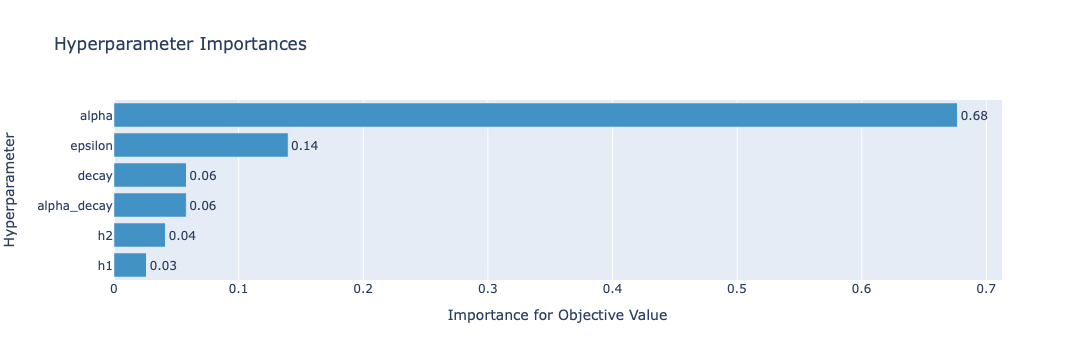

In [110]:
optuna.visualization.plot_param_importances(study)

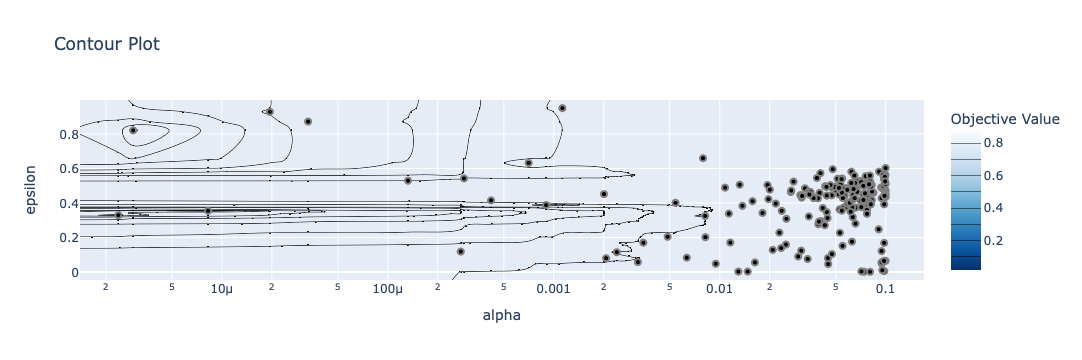

In [111]:
optuna.visualization.plot_contour(study, params=['alpha', 'epsilon'])

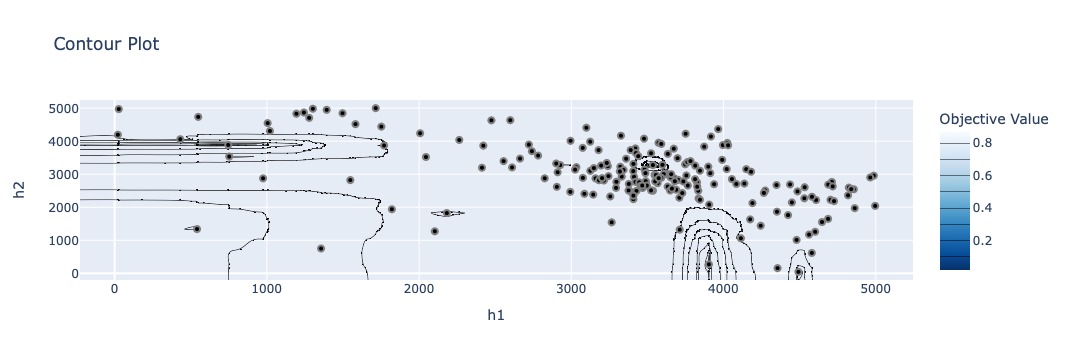

In [113]:
optuna.visualization.plot_contour(study, params=['h1', 'h2'])

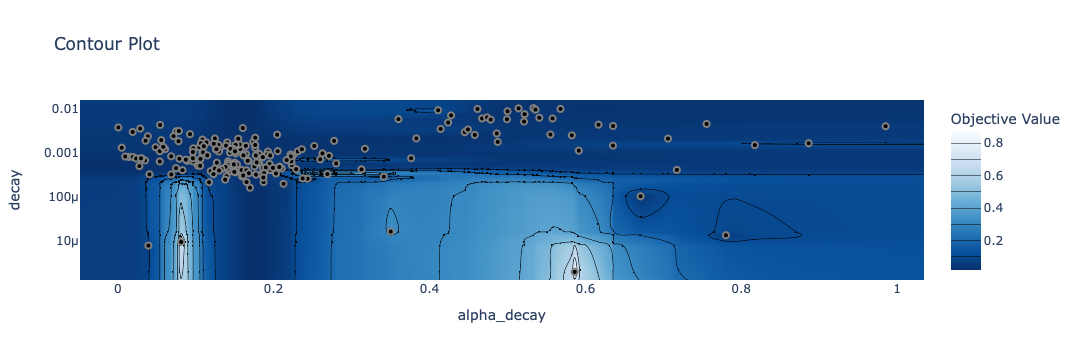

In [112]:
optuna.visualization.plot_contour(study, params=['decay', 'alpha_decay'])